In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn import linear_model
from matplotlib import rcParams
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# Import data
dogdata_w_mat = io.loadmat('dogData_w.mat')
catdata_w_mat = io.loadmat('catData_w.mat')

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

# Combine datasets
CD = np.concatenate((dog_wave,cat_wave),axis=1)

# 80 data points. Use 60 to train. Use 20 to test.
train = np.concatenate((dog_wave[:,:60],cat_wave[:,:60]),axis=1)
test = np.concatenate((dog_wave[:,60:80],cat_wave[:,60:80]),axis=1)
label = np.repeat(np.array([1,-1]),60) # First 60 are dogs, second 60 are cats

# Pseudo-inverse - least-square regression - l2
A = label @ np.linalg.pinv(train)
test_labels = np.sign(A@test)

# LASSO - least absolute shrinkage and selection operator - l1
lasso = linear_model.Lasso().fit(train.T,label)
A_lasso = lasso.coef_
test_labels_lasso = np.sign(A_lasso@test)

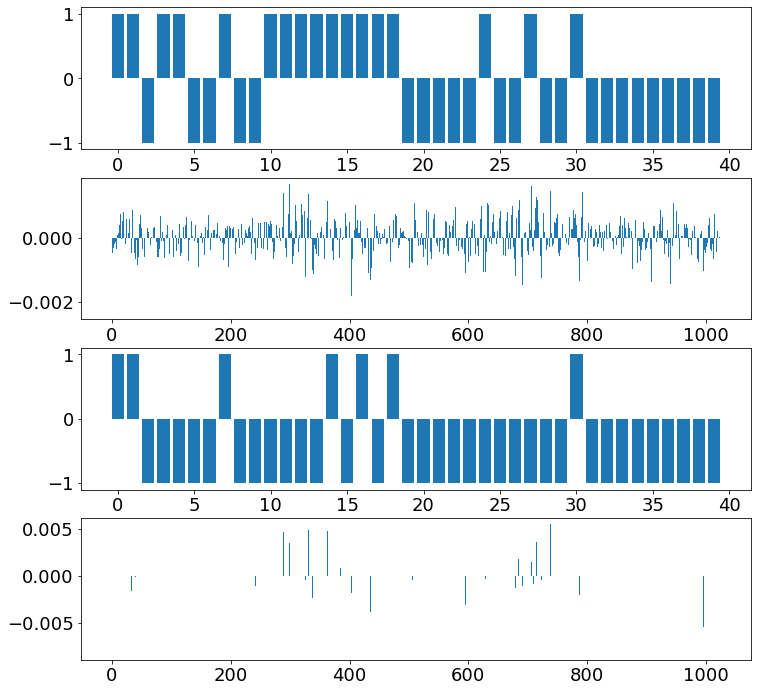

In [3]:
fig,axs = plt.subplots(4,1)

# Figure 6.3a
axs[0].bar(range(len(test_labels)),test_labels)

# Figure 6.3b
axs[1].bar(range(len(A)),A)

# Figure 6.3c
axs[2].bar(range(len(test_labels_lasso)),test_labels_lasso)

# Figure 6.3d
axs[3].bar(range(len(A_lasso)),A_lasso)
plt.show()

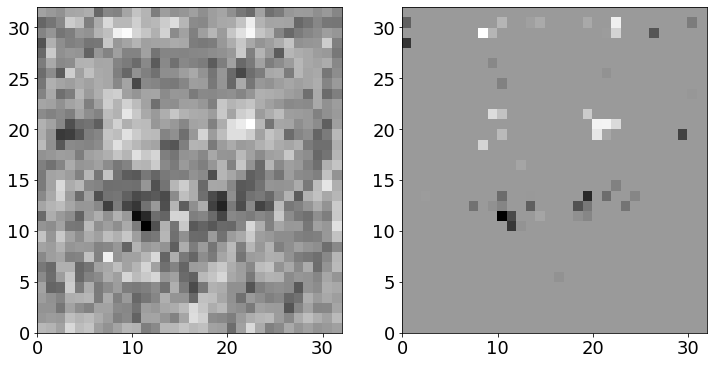

In [4]:
plt.rcParams['figure.figsize'] = [12, 6]
fig,axs = plt.subplots(1,2)
axs = axs.reshape(-1)
A2 = np.flipud(np.reshape(A,(32,32)))
A2_lasso = np.flipud(np.reshape(A_lasso,(32,32)))

# Figure 6.4
axs[0].pcolor(np.rot90(A2),cmap='gray')
axs[1].pcolor(np.rot90(A2_lasso),cmap='gray')
plt.show()